# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

# Observations and Inferences

1. **Effectiveness of Capomulin and Ramicane:**
   - Both Capomulin and Ramicane treatments resulted in significantly lower final tumor volumes compared to Infubinol and Ceftamin. This can be observed in the box plot, where the median tumor volumes for Capomulin and Ramicane are much lower.
   - There were no significant outliers for Capomulin and Ramicane, suggesting that these treatments consistently resulted in lower tumor volumes across different mice.

2. **Correlation between Mouse Weight and Tumor Volume:**
   - For the Capomulin regimen, there is a strong positive correlation (correlation coefficient of approximately 0.842) between mouse weight and average tumor volume. This indicates that heavier mice tended to have larger tumors on average.
   - The linear regression model further supports this observation, showing a clear upward trend between weight and tumor volume.

3. **Gender Distribution:**
   - The distribution of male and female mice in the study is fairly balanced, with slightly more male mice. This is evident from the pie charts, which show that both genders are well-represented in the study. This balanced distribution helps ensure that the results are not biased by gender differences.


In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [41]:
# Checking the number of mice.
unique_mice = merged_df["Mouse ID"].nunique()
unique_mice

249

In [42]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [43]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_indices = merged_df[merged_df["Mouse ID"] == "g989"].index

# Drop the duplicate entries for Mouse ID 'g989'
cleaned_df = merged_df.drop(duplicate_indices)

# Add back one entry for each timepoint for Mouse ID 'g989'
cleaned_df = pd.concat([cleaned_df, merged_df[(merged_df["Mouse ID"] == "g989") & (merged_df.duplicated(subset=["Timepoint"]) == False)]])
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [45]:
# Checking the number unique_mice_cleaned = cleaned_df["Mouse ID"].nunique()
unique_mice_cleaned = cleaned_df["Mouse ID"].nunique()
unique_mice_cleaned

248

## Summary Statistics

In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
#Use groupby and summary statistical methods to calculate the following properties of each drug regimen:mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = cleaned_df.groupby("Drug Regimen").agg(
    Mean_Tumor_Volume=("Tumor Volume (mm3)", "mean"),
    Median_Tumor_Volume=("Tumor Volume (mm3)", "median"),
    Tumor_Volume_Variance=("Tumor Volume (mm3)", "var"),
    Tumor_Volume_Std_Dev=("Tumor Volume (mm3)", "std"),
    Tumor_Volume_Std_Err=("Tumor Volume (mm3)", "sem")
)

summary_stats

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean="mean",
    median="median",
    var="var",
    std="std",
    sem="sem"
)
summary_stats.columns = pd.MultiIndex.from_product([["Tumor Volume (mm3)"], summary_stats.columns])
summary_stats


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

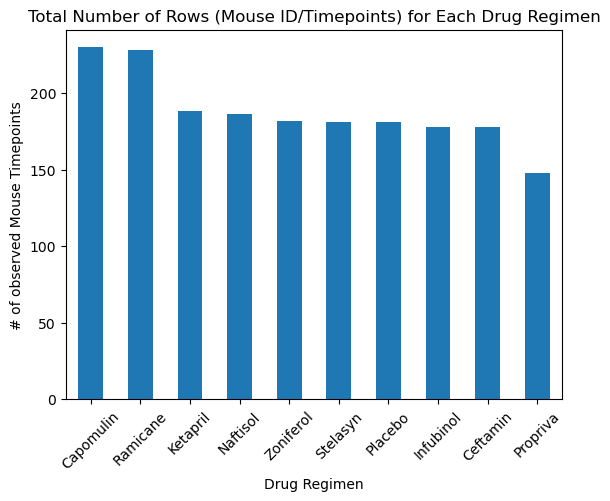

In [48]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_counts = cleaned_df["Drug Regimen"].value_counts()

# Create the bar plot
timepoint_counts.plot(kind="bar", title="Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen", xlabel="Drug Regimen", ylabel="# of observed Mouse Timepoints", rot=45)

# Show the plot
plt.show()


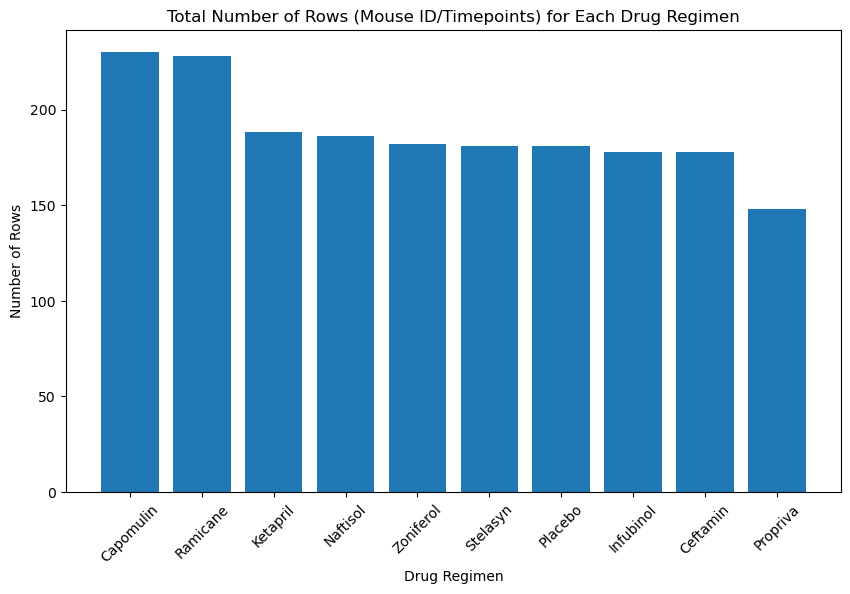

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(timepoint_counts.index, timepoint_counts.values)
plt.title("Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")
plt.xticks(rotation=45)

# Show the plot
plt.show()

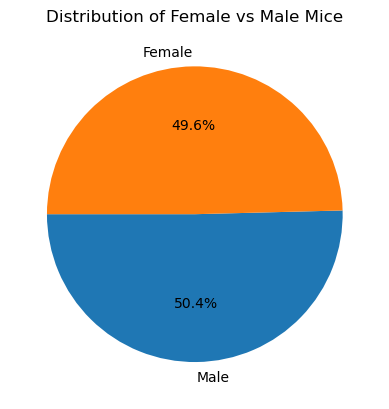

In [50]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice_gender = cleaned_df[["Mouse ID", "Sex"]].drop_duplicates()

# Generate the data for the pie chart
gender_counts = unique_mice_gender["Sex"].value_counts()

# Create the pie chart using Pandas
gender_counts.plot(kind="pie", title="Distribution of Female vs Male Mice", autopct="%1.1f%%", startangle=180)
plt.ylabel('')  # Remove y-label for better visual

# Show the plot
plt.show()


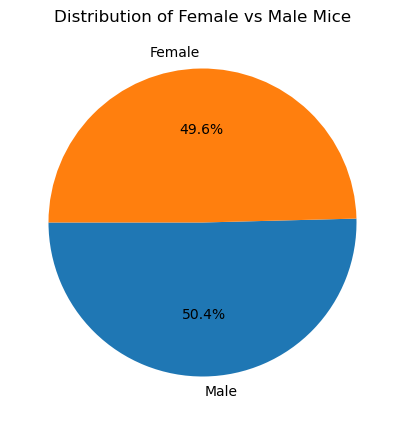

In [51]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
unique_mice_gender = cleaned_df[["Mouse ID", "Sex"]].drop_duplicates()

# Generate the data for the pie chart
gender_counts = unique_mice_gender["Sex"].value_counts()

# Create the pie chart using Matplotlib's pyplot
plt.figure(figsize=(5, 5)) 
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=180)
plt.title("Distribution of Female vs Male Mice")

# Show the plot
plt.show()



## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = cleaned_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint_df, cleaned_df, on=["Mouse ID", "Timepoint"], how="left")

# Filter the DataFrame for the four treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"].isin(treatments)]

final_tumor_volume_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [70]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Add subset
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    print(f"{treatment} treatment: Potential outliers: {outliers}")

quartiles, lowerq, upperq, iqr, lower_bound,  upper_bound

Capomulin treatment: Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane treatment: Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol treatment: Potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin treatment: Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


(0.25    48.722078
 0.50    59.851956
 0.75    64.299830
 Name: Tumor Volume (mm3), dtype: float64,
 48.72207785,
 64.29983003,
 15.577752179999997,
 25.355449580000002,
 87.66645829999999)

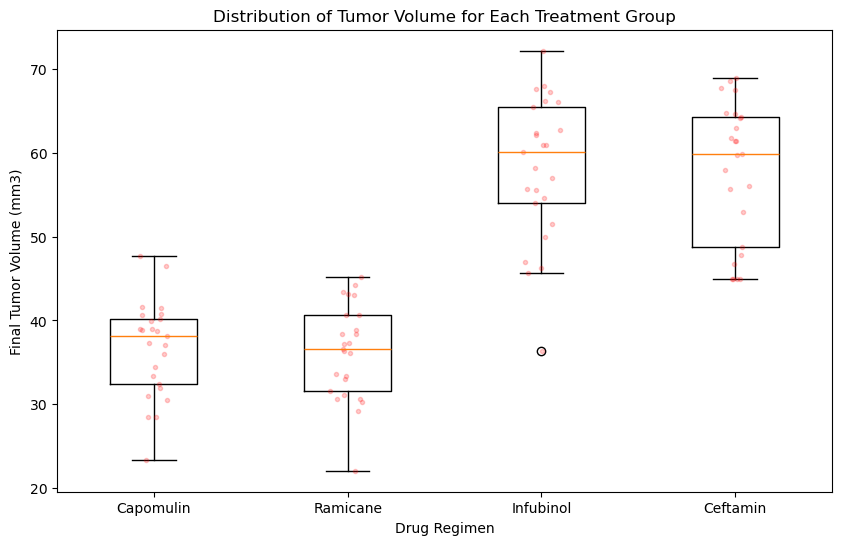

In [56]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatment_list)
plt.title("Distribution of Tumor Volume for Each Treatment Group")
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")

# Highlight any potential outliers in the plot by changing their color and style
# Highlight any potential outliers in the plot by changing their color and style
for i in range(len(treatment_list)):
    y = tumor_vol_data[i]
    x = np.random.normal(i + 1, 0.04, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.2)
plt.show()

## Line and Scatter Plots

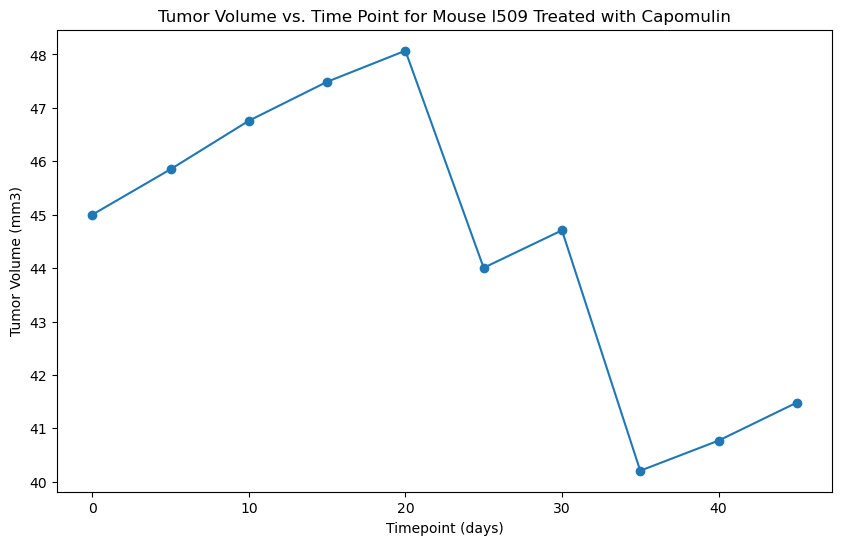

In [65]:
# Select a single mouse treated with Capomulin
single_mouse_id = "l509"  # Selecting a specific mouse ID for demonstration
single_mouse = cleaned_df[(cleaned_df["Drug Regimen"] == "Capomulin") & (cleaned_df["Mouse ID"] == single_mouse_id)]

# Generate a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"], marker='o')
plt.title(f"Tumor Volume vs. Time Point for Mouse {single_mouse_id} Treated with Capomulin")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()


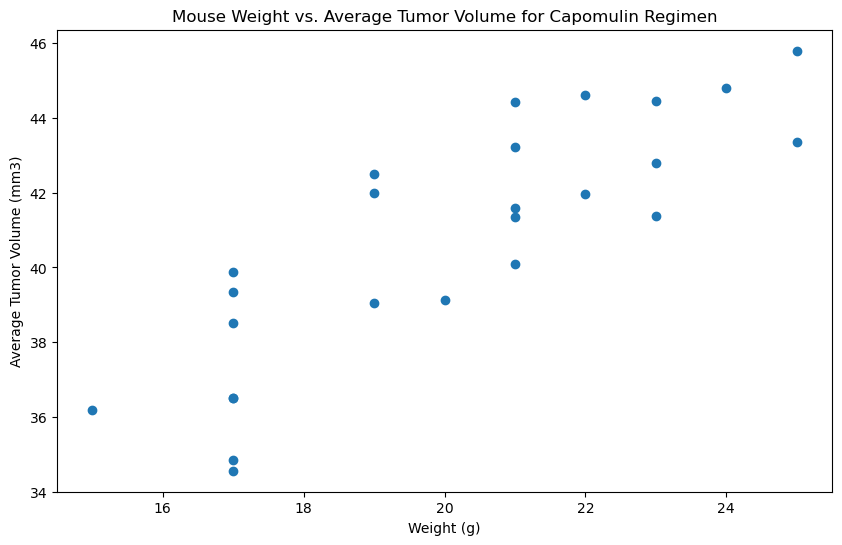

In [67]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data for Capomulin regimen
capomulin_mice = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume and weight for each mouse treated with Capomulin
capomulin_mice_avg = capomulin_mice.groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean().reset_index()

# Rename columns for clarity
capomulin_mice_avg = capomulin_mice_avg.rename(columns={"Tumor Volume (mm3)": "avg_tumor_volume", "Weight (g)": "avg_weight"})

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_mice_avg["avg_weight"], capomulin_mice_avg["avg_tumor_volume"])
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()



## Correlation and Regression

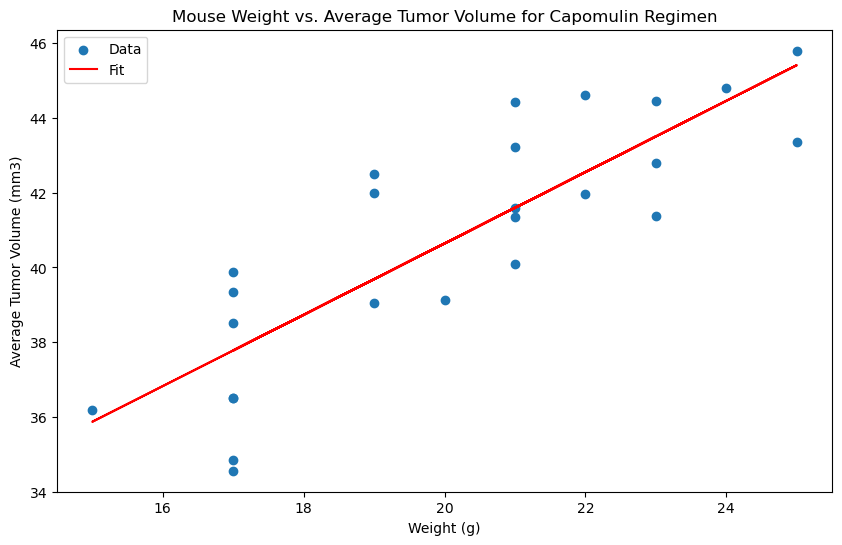

(0.8419363424694721,
 0.9544396890241049,
 21.552160532685008,
 0.8419363424694721,
 1.3225722434712404e-07,
 0.12754359033201323)

In [68]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(capomulin_mice_avg["avg_weight"], capomulin_mice_avg["avg_tumor_volume"])[0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_mice_avg["avg_weight"], capomulin_mice_avg["avg_tumor_volume"])

# Generate a scatter plot with the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_mice_avg["avg_weight"], capomulin_mice_avg["avg_tumor_volume"], label='Data')
plt.plot(capomulin_mice_avg["avg_weight"], slope * capomulin_mice_avg["avg_weight"] + intercept, color='red', label='Fit')
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()

# Show the plot
plt.show()

correlation, slope, intercept, r_value, p_value, std_err
